<a href="https://colab.research.google.com/github/jvellayan/Car-crashes-in-VA/blob/main/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading

In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/data/Virginia_Crashes.csv"
crash_df = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,6,7,19,20,30,31,37,41,42,46,57,58,66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
type(crash_df)

pandas.core.frame.DataFrame

*Inspect the Data*

In [ ]:
crash_df.head(5)

,X,Y,OBJECTID,Alcohol_Notalcohol,A_Crash,A_People,Belted_Unbelted,Bike_Nonbike,B_Crash,B_People,Carspeedlimit,Collision_Type,Crash_Dt,Crash_Event_Type_Dsc,Crash_Military_Tm,Crash_Severity,Crash_Year,C_Crash,C_People,Deer_Nodeer,Distracted_Notdistracted,Document_Nbr,Driverage,Drivergen,Driverinjurytype,Driver_Action_Type_Cd,FAC,Fatal_Crashes,First_Harmful_Event,FUN,Gr_Nogr,Hitrun_Not_Hitrun,K_People,LATITUDE,Light_Condition,Local_Case_Cd,LONGITUDE,Motor_Nonmotor,MPO_NAME,Ownership,Passage,Passgen,Passinjurytype,Pdo_Crash,Pedage,Pedestrians_Injured,Pedinjurytype,Ped_Nonped,Persons_Injured,Rd_Type,Rns_Mp,Roadway_Alignment,Roadway_Surface_Cond,Route_Or_Street_Nm,Rte_Cat,Rte_Nm,School_Zone,Senior_Notsenior,Speed_Notspeed,Summons_Issued_Cd,SYSTEM,Vehiclenumber,Vehicle_Body_Type_Cd,VSP,Weather_Condition,Work_Zone_Related,Young_Notyoung,Vdot_District,PDCNAME,DIAGRAM,Physical_Juris
0,-79.967048,37.129694,4001,NaN,0,0,NaN,NaN,0,0,NaN,2. Angle,2018-12-22T00:00:00.000Z,20. Motor Vehicle In Transport,1547,PDO.Property Damage Only,2018,0,0,NaN,NaN,183605178,"57,52","Female,Male","PDO,PDO","16. Improper Turn From Wrong Lane,1. No Improp...","1.Divided, no control of access",0,1. On Roadway,2.Rural Other Principal Arterial,NaN,NaN,0,37.129686,2. Daylight,2018-094097,-79.967045,NaN,NaN,VDOT_PRI,NaN,NaN,NaN,1,NaN,0,NaN,NOTPED,0,NOT-RD,51.072294,1. Straight - Level,1. Dry,26472 Virgil H Goode Hwy,US,R-VA US00220NB,3. No,NaN,NaN,"1. Yes,2. No",PRIMARY,"1,2","3. Van,3. Van",6,1. No Adverse Condition (Clear/Cloudy),2. No,NaN,2.Salem District,"Roanoke Valley-Alleghany, West Piedmont",http://rns/APP/Images/CrashDiagramProxy.aspx?d...,33.Franklin
1,-79.342818,37.301027,4002,NaN,0,0,NaN,NaN,0,0,60.0,4. Sideswipe - Same Direction,2018-09-01T00:00:00.000Z,20. Motor Vehicle In Transport,1635,PDO.Property Damage Only,2018,0,0,NaN,NaN,182485223,"51,29","Male,Male","PDO,PDO","14. Improper Turn - Wide Right Turn,1. No Impr...","1.Divided, no control of access",0,1. On Roadway,2.Rural Other Principal Arterial,NaN,NaN,0,37.301020,2. Daylight,201819137,-79.342815,NaN,Central Virginia Metropolitan Planning Organiz...,VDOT_PRI,NaN,NaN,NaN,1,NaN,0,NaN,NOTPED,0,NOT-RD,193.905648,1. Straight - Level,1. Dry,460/E LYN SALEM TURNPIKE,US,R-VA US00460WB,3. No,NaN,NaN,"2. No,2. No",PRIMARY,"1,2","2. Truck - Pick-up/Passenger Truck,1. Passenge...",6,1. No Adverse Condition (Clear/Cloudy),2. No,NaN,2.Salem District,Region 2000 Regional,http://rns/APP/Images/CrashDiagramProxy.aspx?d...,9.Bedford
2,-79.497418,37.323679,4003,NaN,0,0,NaN,NaN,0,0,50.0,1. Rear End,2015-04-25T00:00:00.000Z,20. Motor Vehicle In Transport,2119,PDO.Property Damage Only,2015,0,0,NaN,NaN,151165237,"22,45","Female,Female","PDO,PDO","37. Other,1. No Improper Action","1.Divided, no control of access",0,1. On Roadway,E.Urban Other Principal Arterials; Connecting ...,NaN,NaN,0,37.323671,4. Darkness - Road Lighted,2015002033,-79.497415,NaN,NaN,VDOT_PRI,NaN,NaN,NaN,1,NaN,0,NaN,NOTPED,0,NOT-RD,184.677109,1. Straight - Level,2. Wet,E LYNCHBURG SALEM TPKE,US,R-VA US00460EB,3. No,NaN,NaN,"1. Yes,2. No",PRIMARY,"1,2","1. Passenger car,22. Truck - Sport Utility Veh...",6,5. Rain,2. No,NaN,2.Salem District,Region 2000 Regional,http://rns/APP/Images/CrashDiagramProxy.aspx?d...,141.Bedford
3,-79.917538,37.078088,4004,NaN,0,0,NaN,NaN,0,0,55.0,4. Sideswipe - Same Direction,2019-11-24T00:00:00.000Z,20. Motor Vehicle In Transport,1915,PDO.Property Damage Only,2019,0,0,NaN,NaN,193305263,"44,21","Male,Male","PDO,PDO","42. Improper or Unsafe Lane Change,1. No Impro...","1.Divided, no control of access",0,1. On Roadway,E.Urban Other Principal Arterials; Connecting ...,NaN,NaN,0,37.078081,5. Darkness - Road Not Lighted,DIV619106121,-79.917535,NaN,NaN,VDOT_PRI,NaN,NaN,NaN,1,NaN,0,NaN,NOTPED,0,NOT-RD,46.289636,3. Grade - Straight,1. Dry,VIRGIL H. GOODE HIGHWAY (US 220),US,R-VA US00220NB,3. No,NaN,NaN,"1. Yes,2. No",PRIMARY,"1,2","2. Truck - Pick-up/Passenger Truck,1. Passenge...",6,1. No Adverse Condition (Clear/Cloudy),2. No,NaN

In [ ]:
crash_df.describe()

,X,Y,OBJECTID,A_Crash,A_People,B_Crash,B_People,Carspeedlimit,Crash_Military_Tm,Crash_Year,C_Crash,C_People,Document_Nbr,Fatal_Crashes,K_People,LATITUDE,LONGITUDE,Passage,Pdo_Crash,Pedage,Pedestrians_Injured,Persons_Injured,Rns_Mp,VSP
count,883999.000000,883999.000000,884006.000000,884006.000000,884006.000000,884006.000000,884006.000000,469353.000000,884006.000000,884006.000000,884006.000000,884006.000000,8.840060e+05,884006.000000,884006.000000,883999.000000,883999.000000,53798.000000,884006.000000,10862.000000,884006.000000,884006.000000,838920.000000,884006.000000
mean,-77.811347,37.773538,442003.500000,0.050350,0.061748,0.195588,0.274502,49.276856,1345.957917,2016.051640,0.092543,0.182353,1.626910e+08,0.005778,0.006158,37.773530,-77.811344,34.914699,0.655740,37.213405,0.013010,0.518603,54.735917,4.198951
std,1.406038,0.804904,255190.695371,0.218667,0.298164,0.396653,0.639899,11.197550,549.822160,1.992906,0.289792,0.531058,1.981725e+07,0.075795,0.083791,0.804904,1.406038,76.478686,0.475127,19.297236,0.119999,0.898320,88.772842,2.239593
min,-83.655420,36.538884,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,2013.000000,0.000000,0.000000,1.300150e+08,0.000000,0.000000,36.538877,-83.655415,0.000000,0.000000,0.000000,0.000000,0.000000,-6.089310,1.000000
25%,-78.305838,37.059894,221002.250000,0.000000,0.000000,0.000000,0.000000,45.000000,930.000000,2014.000000,0.000000,0.000000,1.431651e+08,0.000000,0.000000,37.059887,-78.305836,19.000000,0.000000,21.000000,0.000000,0.000000,1.343647,2.000000
50%,-77.449237,37.551719,442003.500000,0.000000,0.000000,0.000000,0.000000,45.000000,1430.000000,2016.000000,0.000000,0.000000,1.623050e+08,0.000000,0.000000,37.551712,-77.449235,30.000000,1.000000,34.000000,0.000000,0.000000,8.086485,5.000000
75%,-77.102782,38.660445,663004.750000,0.000000,0.000000,0.000000,0.000000,55.000000,1742.000000,2018.000000,0.000000,0.000000,1.812451e+08,0.000000,0.000000,38.660437,-77.102779,50.000000,1.000000,53.000000,0.000000,1.000000,71.331757,6.000000
max,-75.344182,39.437500,884006.000000,1.000000,54.000000,1.000000,58.000000,70.000000,2359.000000,2019.000000,1.000000,33.000000,2.005251e+08,1.000000,6.000000,39.437493,-75.344180,17104.000000,1.000000,103.000000,8.000000,58.000000,510.240000,7.000000


In [ ]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884006 entries, 0 to 884005
Data columns (total 71 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   X                         883999 non-null  float64
 1   Y                         883999 non-null  float64
 2   OBJECTID                  884006 non-null  int64  
 3   Alcohol_Notalcohol        51686 non-null   object 
 4   A_Crash                   884006 non-null  int64  
 5   A_People                  884006 non-null  int64  
 6   Belted_Unbelted           33498 non-null   object 
 7   Bike_Nonbike              4761 non-null    object 
 8   B_Crash                   884006 non-null  int64  
 9   B_People                  884006 non-null  int64  
 10  Carspeedlimit             469353 non-null  float64
 11  Collision_Type            884006 non-null  object 
 12  Crash_Dt                  884006 non-null  object 
 13  Crash_Event_Type_Dsc      884006 non-null  o

In [ ]:
crash_df["Vehicle_Body_Type_Cd"].value_counts()

1. Passenger car,1. Passenger car                                                                                                                                                                                                                   172130
1. Passenger car                                                                                                                                                                                                                                    138996
1. Passenger car,22. Truck - Sport Utility Vehicle (SUV)                                                                                                                                                                                             64642
22. Truck - Sport Utility Vehicle (SUV),1. Passenger car                                                                                                                                                                                             48

In [ ]:
crash_df["Physical_Juris"].value_counts()


29.Fairfax            90544
134.Virginia Beach    46260
43.Henrico            41894
76.Prince William     39062
20.Chesterfield       38795
                      ...  
318.Virgilina             5
213.Dungannon             4
293.St. Charles           4
175.Branchville           3
316.Urbanna               2
Name: Physical_Juris, Length: 323, dtype: int64

In [ ]:
crash_df["Crash_Severity"].value_counts()

PDO.Property Damage Only    579678
B.Visible Injury            172901
C.Nonvisible Injury          81809
A.Severe Injury              44510
K.Fatal Injury                5108
Name: Crash_Severity, dtype: int64

*For the data cleaning and visualizing part, we need to first figure out what each feature means and whether it will be useful to us at all.*
# Feature Selection: 













*   X - its just the longitude (redundant feature - DROP)
*   Y - its just the latitude (redundant feature - DROP)
*   OBJ - unique Identifier for each crash (no predictive value - DROP)
*   Alcohol_notAlcohol - has a string "ALCOHOL" if someone was drunk (KEEP)
*   A_Crash - 1 if the crash was "A" meaning there was "severe injury", 0 else (KEEP)
*   A_People - integer number of people who had a "severe injury" in the incident (KEEP)
*   B_Crash - 1 if the crash was "B" meaning there was "visible injury" (KEEP)
*   B_People - integer number of people who had a "visible injury" in the incident (KEEP)
*   Carspeedlimit - speed limit for vehicles at location of accident (KEEP)
*   Collisontype - contains category of accident like "angle, fixed object off road, deer, etc" (KEEP) 
*   Crash_Dt - date and time of the crash (since the date doesn't matter since we have road conditons and weather, and we already have the time, possibly redundant feature, but also different days of the year might be important like new years idk - TBD)
*   Crash_Event_Type_Dsc - ex "motor vehicle in transport" (probably going to want to drop this one since it won't really have much predictive value - TBD/DROP)
*   Crash_Military_Tm - time of crash in military time (KEEP)
*   Crash_Severity - severity of the crash (I triple checked this but all of the info in this category is actually encoded in greater detail in A_crash, Fatal_crashes, PDO_Crashes etc so this is redundant, but we probably want to make our own metric for this combining the others so - TBD this but make a new one TALK TO TA)
*   Crash Year - unlikely we care since we are only looking at a 6 year window, but plot the correlation and see if it indicates anything (TBD but likely DROP)
*   C_Crash - 1 if the crash was "A" meaning there was "non-visible injury", 0 else (KEEP)
*   C_People - integer number of people who had a "non-visible injury" in the incident (KEEP)
*   Deer_noDeer - string "DEER" if a deer was hit causing the crash, blank otherwise (KEEP? probably won't indicate much).
*   Distracted_notDistracted - string "DISTRACTED" if the driver was distracted otherwise nothing (KEEP)
*   Document_Nbr - the number on their accident report (we don't care- DROP)
*   Driverage - age of the driver/drivers in years (might be a pain to parse through it because well have to separate it all. maybe do min age and max age, ask TA how - KEEP)
*   Drivergen - gender of the driver/drivers if more were involved (same story with driver age).
*   Driverinjurytype - lists the injury types of the drivers (DROP b/c that info is really included in the total number people with certain types of injuries)
*   DriverActionType - what the driver/drivers did to cause accident. categories represented as strings (maybe go through and just look if at least one person did this action thing label it as that - KEEP)
*   FAC - string categories of the road layout like "two way, non-divided" (KEEP)
*   Fatal_Crashes - 1 if the crash was fatal, 0 otherwise (KEEP)
*   First_harmful_event - where the accident happened? on shoulder? on road (confused about what this is, but based on the labels i think we KEEP)
*   FUN - the environment, is it urban rural, a highway etc (KEEP)
*   Gr_noGr - no idea what this is it isn't on the site yet its in the dataset so it can't be that important (DROP)
*   Hitrun_notHitRun - while its interesting, it won't help us make better laws since of course they are super illegal regardless of craash severity (DROP)
*   K_people - number of people killed (KEEP)
*   Latitude - latitude of crash location (KEEP)
*   Light Condition - categories of light conditions at time of crash (KEEP)
*   Local_Case_CD - we don't care (DROP)
*   Longitude - longitude of crash location (KEEP)
*   Motor_NoMotor - don't know what it means (KEEP? - TBD)
*   MPO_NAME - basically their driving district (Metropolitan Planning Organization) (DROP)
*   Ownership - What kind of ownership of the vehicle it is (DROP)
*   Passage - ages of the passengers if there were any (KEEP)
*   Passgen - gender of the passengers (unlikely we care at all DROP)
*   Passgen_injurytype- same reason as driver injury type (already included in other features DROP)
*   Pdo_Crash - 1 if crash was property damage only, 0 if otherwise (KEEP)
*   Ped_age   - age of the pedestrian/pedestrians (KEEP, but talk to TA how to handle)
*   Pedestrians_Injured - number of pedestrians injured (KEEP)
*   Pedinjurytype - same reason as driver injury type (already included in other features DROP)
*   Ped_Notped - included in the number of pedestrians, if 0 , then notped, if 1 or more then ped (DROP)
*   Persons_injured - total number of people injured (TBD - because it it will already be included in the other features with injuries)
*   Rd_type - not what you think it is its just left right middle or n/a, we really care about the surface conditions (DROP)
*   Rns_mp  - mile post marker (DROP)
*   Roadway_alignment - how the roadway is setup (bends etc KEEP)
*   Roadway_surface_conditions - conditions of the road categories (KEEP)
*   Route_or_StreetNM - route or street name? dont think we care (DROP)
*   RTE_Cat - route category but its a number? idk what this is (DROP)
*   RTE_NM  - route name, don't think this matters (DROP)
*   School_Zone - whether or not its a school zone where it happened (KEEP)
*   Senior_notSenior - whether or not their was an old person involved or hurt? (Drop)
*   Speed_notSpeed - "SPEED" if theyre speeding, otherwise not (KEEP)
*   Summons_Issued - whether or not they were called to court (DROP)
*   SYSTEM - primary, secondary, Other, idkw what those are (DROP)
*   Vehiclenumber - (DROP)
*   VehicleBodyType- type of vehiles involved (definitely want to keep, but idk how to encode it cause theres 4000 different categories all combos of vehicle types TBD)
*   VSP - virginia state police precint i think - (DROP)
*   Weather_Condition - weather categories (KEEP)
*   Work_Zone_Related - whether it was in a work zone (KEEP)
*   Yount_notYoung - encoded in age (Drop)
*   VDOT_District - which district it was in, but more general than Physical jurisdiction so i think we (DROP)
*   PDC_Name - idk but it seems redundant with jurisdiction but less specific (DROP)
*   Diagram - some link (DROP)
*   Physical_Juris - more specific than vdot and pdc so keep (KEEP)


*Drop the unnecessary features*

In [ ]:
crash_df = crash_df.drop(['X','Y', 'OBJECTID', 'Crash_Event_Type_Dsc','Young_Notyoung','Senior_Notsenior', 'Crash_Year', 'Crash_Dt','Document_Nbr', 'Driverinjurytype','Gr_Nogr', 'Local_Case_Cd', 'MPO_NAME','Ownership', 'Passgen', 'Passinjurytype', 'Pedinjurytype', 'Ped_Nonped','Rns_Mp','Route_Or_Street_Nm','Rte_Cat', 'Rd_Type','Rte_Nm','Summons_Issued_Cd','SYSTEM','Vehiclenumber','VSP', 'Vdot_District', 'PDCNAME','DIAGRAM'], axis=1)

In [ ]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884006 entries, 0 to 884005
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Alcohol_Notalcohol        51686 non-null   object 
 1   A_Crash                   884006 non-null  int64  
 2   A_People                  884006 non-null  int64  
 3   Belted_Unbelted           33498 non-null   object 
 4   Bike_Nonbike              4761 non-null    object 
 5   B_Crash                   884006 non-null  int64  
 6   B_People                  884006 non-null  int64  
 7   Carspeedlimit             469353 non-null  float64
 8   Collision_Type            884006 non-null  object 
 9   Crash_Military_Tm         884006 non-null  int64  
 10  Crash_Severity            884006 non-null  object 
 11  C_Crash                   884006 non-null  int64  
 12  C_People                  884006 non-null  int64  
 13  Deer_Nodeer               54712 non-null   o

# Data Cleaning

Now that we have reduced our dataset to nonrepetive and relevant features, we must address the missingness in our data. Many binary features have NaN instead of zeros. These binary features are named "Alcohol_notAlcohol", "Belted_Unbelted", "Bike_Nonbike", "Deer_Nodeer", "Distracted_Notdistracted", "Motor_Nonmotor", "Senior_Notsenior", "Speed_Notspeed", "Young_Notyoung", and "Hitrun_Not_Hitrun". These features are only filled out when their flag occured; otherwise, they are left blank and appear as NaN in our data. We replaced all of the NaN in the binary features with 0 and changed their flag from a string to 1.

In [ ]:
#Replace the flag for these columns with a 1
crash_df['Alcohol_Notalcohol'] = crash_df['Alcohol_Notalcohol'].replace('ALCOHOL', 1) #1 indicates alcohol 
crash_df['Belted_Unbelted'] = crash_df['Belted_Unbelted'].replace('UNBELTED', 1) #1 indicates unbelted
crash_df['Bike_Nonbike'] = crash_df['Bike_Nonbike'].replace('BIKE', 1) #1 indicates bike
crash_df['Deer_Nodeer'] = crash_df['Deer_Nodeer'].replace('DEER', 1) #1 indicates deer
crash_df['Distracted_Notdistracted'] = crash_df['Distracted_Notdistracted'].replace('DISTRACTED', 1) #1 indicates distracted
crash_df['Motor_Nonmotor'] = crash_df['Motor_Nonmotor'].replace('MOTOR', 1) #1 indicates motor
crash_df['Speed_Notspeed'] = crash_df['Speed_Notspeed'].replace('SPEED', 1) #1 indicates speeding
crash_df['Hitrun_Not_Hitrun'] = crash_df['Hitrun_Not_Hitrun'].replace('HIT_RUN', 1) #1 indicates hit and run

In [ ]:
#Replace the NaN values for these columns with a 0
crash_df['Alcohol_Notalcohol'] = crash_df['Alcohol_Notalcohol'].fillna(0)
crash_df['Belted_Unbelted'] = crash_df['Belted_Unbelted'].fillna(0)
crash_df['Bike_Nonbike'] = crash_df['Bike_Nonbike'].fillna(0)
crash_df['Deer_Nodeer'] = crash_df['Deer_Nodeer'].fillna(0)
crash_df['Distracted_Notdistracted'] = crash_df['Distracted_Notdistracted'].fillna(0)
crash_df['Motor_Nonmotor'] = crash_df['Motor_Nonmotor'].fillna(0)
crash_df['Speed_Notspeed'] = crash_df['Speed_Notspeed'].fillna(0)
crash_df['Hitrun_Not_Hitrun'] = crash_df['Hitrun_Not_Hitrun'].fillna(0)

While the feature "Work_Zone_Related" does not have missingness, it is a binary represented with "Yes" and "No". We will recode that as 1 for "Yes" and 0 for "No".

In [ ]:
crash_df.groupby('Work_Zone_Related').size()

Work_Zone_Related
1. Yes     21592
2. No     862414
dtype: int64

In [ ]:
crash_df['Work_Zone_Related'] = crash_df['Work_Zone_Related'].replace('1. Yes', 1) 
crash_df['Work_Zone_Related'] = crash_df['Work_Zone_Related'].replace('2. No', 0) 

Additionally, the feature "School_Zone" can be turned into a binary with 1 for "Yes" and 0 for "No".

In [ ]:
crash_df.groupby('School_Zone').size()

School_Zone
1. Yes                             9489
2. Yes - With School Activity      3483
3. No                            871034
dtype: int64

In [ ]:
crash_df['School_Zone'] = crash_df['School_Zone'].replace('1. Yes', 1) 
crash_df['School_Zone'] = crash_df['School_Zone'].replace('2. Yes - With School Activity', 1) 
crash_df['School_Zone'] = crash_df['School_Zone'].replace('3. No', 0) 

In [ ]:
crash_df.groupby('School_Zone').size()

School_Zone
0    871034
1     12972
dtype: int64

Additionally, "Passage" and "Pedage" only have values indicating the age of a passenger or a pedestrian if there was one. We will recode these columns to contain an age if there was a passenger or pedestrian and to have 0 if there was not one.

In [ ]:
crash_df['Passage'] = crash_df['Passage'].fillna(-1)
crash_df['Pedage'] = crash_df['Pedage'].fillna(-1)

469,353 of 884,006 instances have a speed limit. We will use median imputation to provide data for the instance without a speed limit.

In [ ]:
crash_df.groupby('Carspeedlimit').size()

Carspeedlimit
15.0        25
20.0        18
25.0     19464
30.0      6027
35.0     59536
40.0     25274
45.0    125134
50.0      9396
55.0    131278
60.0     33048
65.0     29867
70.0     30286
dtype: int64

In [ ]:
crash_df['Carspeedlimit'] = crash_df['Carspeedlimit'].fillna(crash_df['Carspeedlimit'].median())

FAC is also missing values. 784,674 of the 884,006 instances have values. It is a categorical feature, making imputation difficult. The same instance missing the feature "FAC" are also missing the feature "FUN". We will drop those instances, since they are missing both features and they only make up about 11% of the dataset. If our dataset were not so large, we would not do this.

In [ ]:
crash_df.groupby('FUN').size()

FUN
1.Rural Interstate                                                                        28280
2.Rural Other Principal Arterial                                                          40728
3.Rural Minor Arterial                                                                    52784
4.Rural Major Collector                                                                   43673
5.Rural Minor Collector                                                                   14402
6.Rural Local                                                                             26682
A.Urban Interstate                                                                       112919
B.Urban Freeways and Expressways; Connecting Links of Rural Principal Arterial            18501
E.Urban Other Principal Arterials; Connecting Links of Other Rural Principal Arterial    177728
H.Urban Minor Arterial                                                                   163911
I.Urban Collector                   

In [ ]:
crash_df.groupby('FUN').size()

FUN
1.Rural Interstate                                                                        28280
2.Rural Other Principal Arterial                                                          40728
3.Rural Minor Arterial                                                                    52784
4.Rural Major Collector                                                                   43673
5.Rural Minor Collector                                                                   14402
6.Rural Local                                                                             26682
A.Urban Interstate                                                                       112919
B.Urban Freeways and Expressways; Connecting Links of Rural Principal Arterial            18501
E.Urban Other Principal Arterials; Connecting Links of Other Rural Principal Arterial    177728
H.Urban Minor Arterial                                                                   163911
I.Urban Collector                   

In [ ]:
crash_df = crash_df.dropna(subset=['FAC'])

In [ ]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784674 entries, 0 to 884005
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Alcohol_Notalcohol        784674 non-null  float64
 1   A_Crash                   784674 non-null  int64  
 2   A_People                  784674 non-null  int64  
 3   Belted_Unbelted           784674 non-null  float64
 4   Bike_Nonbike              784674 non-null  float64
 5   B_Crash                   784674 non-null  int64  
 6   B_People                  784674 non-null  int64  
 7   Carspeedlimit             784674 non-null  float64
 8   Collision_Type            784674 non-null  object 
 9   Crash_Military_Tm         784674 non-null  int64  
 10  Crash_Severity            784674 non-null  object 
 11  C_Crash                   784674 non-null  int64  
 12  C_People                  784674 non-null  int64  
 13  Deer_Nodeer               784674 non-null  f

In the previous dataframe, some "LATITUDE" and "LONGITUDE" values were missing. All of the instances that were missing "FAC" and "FUN" were also missing "LATITUDE" and "LONGITUDE". Dropping those instances leads to no missing values in "FAC", "FUN", "LATITUDE", or "LONGITUDE". Now the only column with missing values is "Driverage", which we will address below.

*Driverage*

In [ ]:
crash_df["Driverage"].value_counts()

19             9948
21             9664
22             9572
20             9292
18             9159
               ... 
24,28,47,23       1
49,18,47          1
50,40,71          1
18,35,35          1
51,35,39,49       1
Name: Driverage, Length: 70858, dtype: int64

In [ ]:
# first drop the instances where the driver age its null
crash_df = crash_df.dropna(subset=['Driverage']) #will drop ~9,000 values which is about 1%
#still 775,095 instances which is huge

In [ ]:
driverages = crash_df["Driverage"]
#now there are no null values
driverages.isna().sum()


0

In [ ]:
da_list = driverages.to_list() #probably a better way to do this but whatever
n = len(da_list)
#initialize list indices to 0 for different age groups
youngList = [0]*n #ages 15 to 25
midYoung = [0]*n #ages 25 to 40
mid= [0]*n #ages 40-60
midOld = [0]*n #ages 60-75
old =[0]*n #ages 75+
for i in range(len(da_list)):
  string = da_list[i]
  #split the string into a list containing the ages as strings
  subList = string.split(',')

  #each age in the sublist check which range it falls into and increment the index of that ranges element there
  for num in subList:
    if (15 <= int(num) and int(num)< 25):
      youngList[i]+= 1
    elif (25 <= int(num) and int(num)< 40):
      midYoung[i] +=1
    elif (40 <= int(num) and int(num)< 60):
      mid[i] +=1 
    elif (60 <= int(num) and int(num)< 75):
      midOld[i] +=1
    elif (75 <= int(num)):
      old[i] +=1
    else:
      break


In [ ]:
print(youngList[:15])
print(midYoung[:15])
print(mid[:15])
print(da_list[:15])
#seems to be working

[0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0]
[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1]
[2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1]
['57,52', '51,29', '22,45', '44,21', '41,36', '53,37', '30,59', '23,44', '28,23', '30,57', '54,26', '40,41', '22,54', '22,62', '53,38']


In [ ]:
#add these columns to the dataframe
crash_df['drAge_young'] = youngList
crash_df['drAge_midyoung'] = midYoung
crash_df['drAge_mid'] = mid
crash_df['drAge_midold'] = midOld
crash_df['drAge_old'] = old

In [ ]:
#now that I've dealt with it and have condensed these other features I can drop the original
crash_df = crash_df.drop(['Driverage'], axis=1)

Driver age was split into multiple binary columns that indicate the age range. 

DriverGen: Clean the comma separated lists of genders below.

In [ ]:
crash_df["Drivergen"].value_counts()

Male                                                      135954
Male,Male                                                 135872
Male,Female                                               108072
Female,Male                                               101594
Female,Female                                              89658
                                                           ...  
Male,Female,Male,Female,Female,Not Provided                    1
Not Provided,Male,Female,Male,Female,Male,Male                 1
Female,Male,Female,Female,Male,Male,Female                     1
Male,Male,Male,Female,Female,Female,Female,Female,Male         1
Not Provided,Not Provided,Female,Female,Female,Male            1
Name: Drivergen, Length: 615, dtype: int64

In [ ]:
drivergens = crash_df["Drivergen"]
dg_list = drivergens.to_list() #probably a better way to do this but whatever
n = len(dg_list)
#initialize list indices to 0 for different age groups
malesInvolved = [0]*n 
femalesInvolved = [0]*n 
notProvided= [0]*n 
for i in range(len(dg_list)):
  string = dg_list[i]
  #print(string)
  #split the string into a list containing the ages as strings
  subList = string.split(',')

  #each age in the sublist check which range it falls into and increment the index of that ranges element there
  for person in subList:
    if (person == 'Male'):
      malesInvolved[i]+= 1
    elif (person == 'Female'):
      femalesInvolved[i] +=1
    else:
      notProvided[i]+=1

In [ ]:
print(malesInvolved[:15])
print(femalesInvolved[:15])
print(notProvided[:15])
print(dg_list[:15])
#seems to be working

[1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2]
[1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['Female,Male', 'Male,Male', 'Female,Female', 'Male,Male', 'Male,Female', 'Female,Female', 'Female,Male', 'Male,Female', 'Female,Male', 'Male,Female', 'Male,Male', 'Female,Male', 'Female,Male', 'Male,Male', 'Male,Male']


In [ ]:
#add these columns to the dataframe
crash_df['malesInvolved'] = malesInvolved
crash_df['femalesInvolved'] = femalesInvolved
crash_df['notProvidedInvolved'] = notProvided

In [ ]:
#now i can drop the category
crash_df = crash_df.drop(['Drivergen'], axis=1)

New binary columns were added to the dataframe that indicated if males were involved, females were involved, or if this information was not provided.

*Driver_Action_Type* 

In [ ]:
crash_df["Driver_Action_Type_Cd"].value_counts()

12. Following Too Close,1. No Improper Action                                                                                             136441
40. Fail to Maintain Proper Control                                                                                                       101464
11. Did Not Have Right-of-Way,1. No Improper Action                                                                                        91112
1. No Improper Action                                                                                                                      58539
40. Fail to Maintain Proper Control,1. No Improper Action                                                                                  35982
                                                                                                                                           ...  
1. No Improper Action,1. No Improper Action,12. Following Too Close,12. Following Too Close,3. Exceeded Safe Speed But Not Speed L

In [ ]:
#find all the possible types of actions by using a python set
dActType = crash_df["Driver_Action_Type_Cd"]
possibleActions = set()
dAct_list = dActType.to_list() #probably a better way to do this but whatever
n = len(dAct_list) 
for i in range(len(dAct_list)):
  string = dAct_list[i]
  #print(string)
  #split the string into a list containing the actions as strings
  subList = string.split(',')

  #go through eachtion
  for action in subList:
    possibleActions.add(action) #since its a set it will only add to this if its not already in there
    

actionsList = list(possibleActions)
sortedPossibleActions = sorted(actionsList)
print(sortedPossibleActions)
print(len(actionsList))


['1. No Improper Action', '10. Wrong Side Of Road - Not Overtaking', '11. Did Not Have Right-of-Way', '12. Following Too Close', '13. Fail to Signal or Improper Signal', '14. Improper Turn - Wide Right Turn', '15. Improper Turn - Cut Corner on Left Turn', '16. Improper Turn From Wrong Lane', '17. Other Improper Turn', '18. Improper Backing', '19. Improper Start From Parked Position', '2. Exceeded Speed Limit', '20. Disregarded Officer or Flagger', '21. Disregarded Traffic Signal', '22. Disregarded Stop or Yield Sign', '23. Driver Distraction', '24. Fail to Stop at Through Highway - No Sign', '25. Drive Through Work Zone', '26. Fail to Set Out Flares or Flags', '27. Fail to Dim Headlights', '28. Driving Without Lights', '29. Improper Parking Location', '3. Exceeded Safe Speed But Not Speed Limit', '30. Avoiding Ped', '31. Avoiding Other Vehicle', '32. Avoiding Animal', '33. Crowded Off Highway', '34. Hit and Run', '35. Car Ran Away - No Driver', '36. Blinded by Headlights', '37. Other',

In [ ]:

#now I know the categories, I can go through the dataset and turn each feature into a boolean where its 1 if the thing happened in that incident and 0 if it didn't
#probably easier way to do this but I'll just brute force this
n = len(dAct_list) #basically the number of instances

improperActions = np.zeros([n,44], dtype = int)

for i in range(n): #go through each instance
  string = dAct_list[i]
  #print(string)
  #split the string into a list containing the actions as strings
  subList = string.split(',')
  #print(subList)
  #go through eachtion
  for actionString in subList:
    
    if actionString == 'Not Applicable':
      improperActions[i][0] = 1
    else:
      #split again based on the decimal and just get the incident number
      actionNum= int(actionString.split('.')[0])
      #add it to the corresponding part of improper actions
      improperActions[i][actionNum] = 1 #basically makes the feature a boolean if a particular action happened in a crash

In [ ]:
#turn each column of improperActions array into a feature
actionColList = list(improperActions.T)
for actNum in range(1, len(actionColList)): #iterate through each column
  #print(actNum)
  #print(list(actionColList[actNum]))
  crash_df['ImpropAct'+str(actNum)] = list(actionColList[actNum])

In [ ]:
crash_df = crash_df.drop(['Driver_Action_Type_Cd'], axis=1)

For different important driver actions, a binary category was added to the dataframe. This ultimately reduced the number of one hot encoded columns for a lot, as many unique actions were entered in the data.

*Vehicle_Body_Type*

In [ ]:
crash_df["Vehicle_Body_Type_Cd"].value_counts()

1. Passenger car,1. Passenger car                                                                                                                                                     149042
1. Passenger car                                                                                                                                                                      120893
1. Passenger car,22. Truck - Sport Utility Vehicle (SUV)                                                                                                                               57483
22. Truck - Sport Utility Vehicle (SUV),1. Passenger car                                                                                                                               42100
22. Truck - Sport Utility Vehicle (SUV)                                                                                                                                                40467
                                                       

In [ ]:
#find all the possible types of actions by using a python set
vehicleType = crash_df["Vehicle_Body_Type_Cd"]
possibleVehicles = set()
vtype_list = vehicleType.to_list() #probably a better way to do this but whatever
n = len(vtype_list) 
for i in range(len(vtype_list)):
  string = vtype_list[i]
  #print(string)
  #split the string into a list containing the actions as strings
  subList = string.split(',')

  #go through eachtion
  for vehicle in subList:
    possibleVehicles.add(vehicle) #since its a set it will only add to this if its not already in there
    

vehiclesList = list(possibleVehicles)
sortedPossibleVehicles= sorted(vehiclesList)
print(sortedPossibleVehicles)
print(len(vehiclesList))


[' Bookmobile', ' Go-cart', ' Golf Cart', ' Hearse', ' Recreational Vehicle', ' etc.)', '1. Passenger car', '10. Moped', '11. Motorcycle', '12. Emergency Vehicle (Regardless of Veh Type)', '13. Bus - School Bus', '14. Bus - City Transit Bus/Privately Owned Church Bus', '15. Bus - Commercial Bus', '16. Other (Scooter', '18. Special Vehicle - Farm Machinery', '19. Special Vehicle - ATV', '2. Truck - Pick-up/Passenger Truck', '21. Special Vehicle - Low Speed Vehicle', '22. Truck - Sport Utility Vehicle (SUV)', '23. Truck - Single Unit Truck (3 Axles or More)', '25. Truck - Truck Tractor (Bobtail-No Trailer)', '3. Van', '4. Truck - Single Unit Truck (2-Axles)', '7. Motor Home', '8. Special Vehicle - Oversized (Veh/Earthmover/Road Equip.)', '9. Bicycle', 'Not Applicable']
27


In [ ]:
#now I know the categories, I can go through the dataset and turn each feature into a boolean where its 1 if the thing happened in that incident and 0 if it didn't
#probably easier way to do this but I'll just brute force this
n = len(vtype_list) #basically the number of instances
print(n)
vehiclesInvolved = np.zeros([n,26], dtype = int)

for i in range(n): #go through each instance
  string = vtype_list[i]
  #print(string)
  #split the string into a list containing the actions as strings
  subList = string.split(',')
  #print(subList)
  #go through eachtion
  for vehicleString in subList:
    
    if vehicleString == 'Not Applicable':
      vehiclesInvolved[i][0] = 1
    elif ((vehicleString == ' Bookmobile') or (vehicleString == ' Go-cart') or (vehicleString == ' Golf Cart') or (vehicleString == ' Hearse') or (vehicleString == ' Recreational Vehicle') or (vehicleString == ' etc.)')): #saying these count as other
      vehiclesInvolved[i][16] = 1
    else:
      #split again based on the decimal and just get the incident number
      vehicleNum= int(vehicleString.split('.')[0])
      #add it to the corresponding part of improper actions
      vehiclesInvolved[i][vehicleNum] = 1 #basically makes the feature a boolean if a particular action happened in a crash

775095


In [ ]:
#turn each column of improperActions array into a feature
vehicleColList = list(vehiclesInvolved.T)
for vNum in range(1, len(vehicleColList)): #iterate through each column
  crash_df['Vehicle_Type_'+str(vNum)] = list(vehicleColList[vNum])

In [ ]:
crash_df = crash_df.drop(['Vehicle_Body_Type_Cd'], axis=1)

Binary categories indicating the type of vehicles were added. This made the data much more meaningful that the comma separated list it was before.

In [ ]:
crash_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775095 entries, 0 to 884005
Data columns (total 113 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Alcohol_Notalcohol        float64
 1   A_Crash                   int64  
 2   A_People                  int64  
 3   Belted_Unbelted           float64
 4   Bike_Nonbike              float64
 5   B_Crash                   int64  
 6   B_People                  int64  
 7   Carspeedlimit             float64
 8   Collision_Type            object 
 9   Crash_Military_Tm         int64  
 10  Crash_Severity            object 
 11  C_Crash                   int64  
 12  C_People                  int64  
 13  Deer_Nodeer               float64
 14  Distracted_Notdistracted  float64
 15  FAC                       object 
 16  Fatal_Crashes             int64  
 17  First_Harmful_Event       object 
 18  FUN                       object 
 19  Hitrun_Not_Hitrun         float64
 20  K_People                 

Fatal Crashes

In [ ]:
crash_df["Fatal_Crashes"].value_counts()

0    770335
1      4760
Name: Fatal_Crashes, dtype: int64

# Visualization

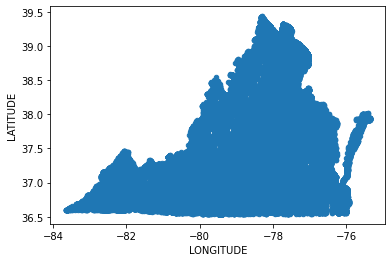

In [ ]:
crash_df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE")

Above is a plot of all the crashes in Virginia by location.

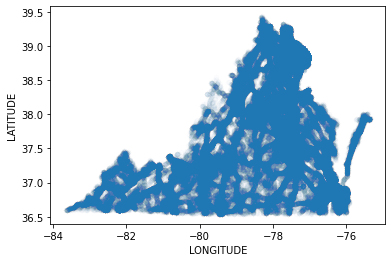

In [ ]:
crash_df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.01)

Above is a plot of all the crashes in Virginia by location, with a smaller alpha in order to see where crashes are more heavily congregated.

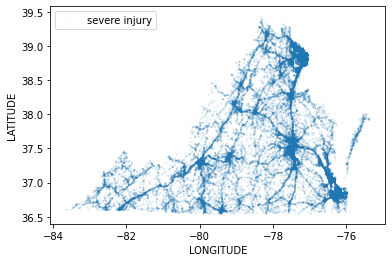

In [ ]:
crash_df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.1,
              s=crash_df["A_Crash"], label="severe injury")

Above is a plot of the crashes in Virginia that resulted in at least one severe injury.

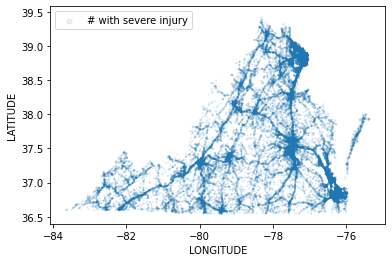

In [ ]:
crash_df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.1,
              s=crash_df["A_People"], label="# with severe injury")

Above is a plot of the crashes in Virginia weighted by the number of severe injuries that occured during the crash.

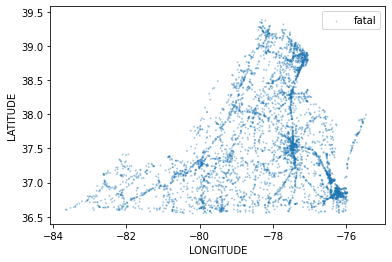

In [ ]:
crash_df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.3,
              s=crash_df["Fatal_Crashes"], label="fatal")

Above is a plot of all the crashes in Virginia that ended in death.

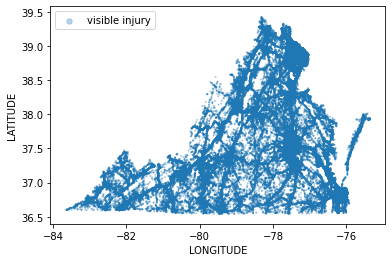

In [ ]:
crash_df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.3,
              s=crash_df["B_People"], label="visible injury")

Above is a plot fo all the crashes in Virginia with at least one visible injury.

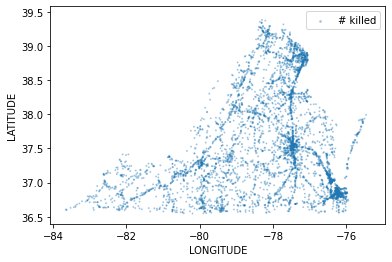

In [ ]:
crash_df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.3,
              s=crash_df["K_People"], label="# killed")

Above is a plot of all the fatal crashes in Virginia that is weighted by the number of people killed.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

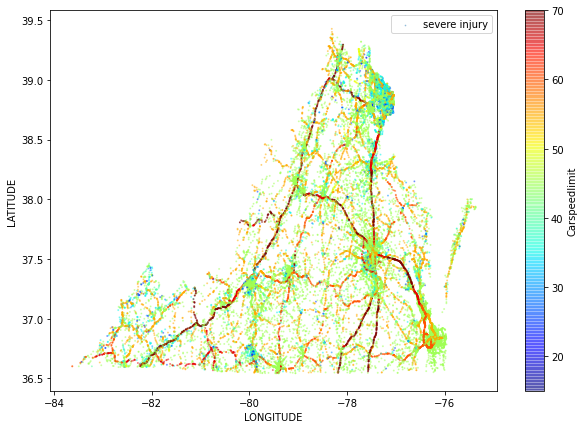

In [ ]:
import matplotlib.pyplot as plt

crash_df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.4,
    s=crash_df["A_Crash"], label="severe injury", figsize=(10,7),
    c="Carspeedlimit", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

Above is a plot of all the crashes that resulted in a severe injury with color coordination to indicate the speed limit at the crash location.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

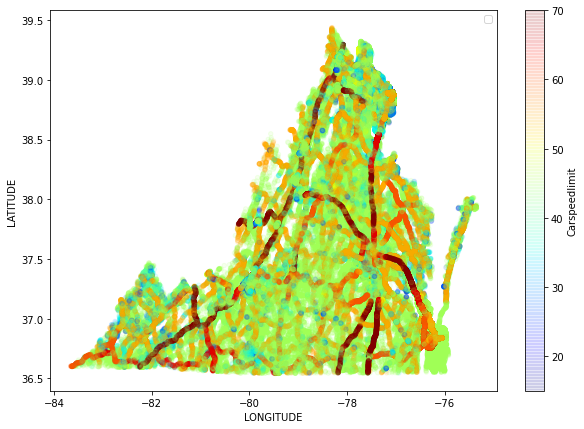

In [ ]:
crash_df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.1,
    figsize=(10,7), c="Carspeedlimit", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

Above is a plot of the speed limits at different crash locations across Virginia.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

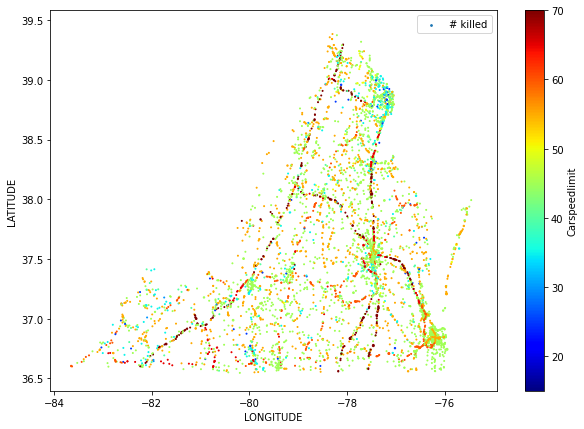

In [ ]:
crash_df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", 
    s=crash_df["K_People"], label="# killed", figsize=(10,7),
    c="Carspeedlimit", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

Above is the a plot of fatal crashes that is color coordinated by the speed limit at the crash location.

#Clustering

In [ ]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775095 entries, 0 to 884005
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Alcohol_Notalcohol        775095 non-null  float64
 1   A_Crash                   775095 non-null  int64  
 2   A_People                  775095 non-null  int64  
 3   Belted_Unbelted           775095 non-null  float64
 4   Bike_Nonbike              775095 non-null  float64
 5   B_Crash                   775095 non-null  int64  
 6   B_People                  775095 non-null  int64  
 7   Carspeedlimit             775095 non-null  float64
 8   Collision_Type            775095 non-null  object 
 9   Crash_Dt                  775095 non-null  object 
 10  Crash_Military_Tm         775095 non-null  int64  
 11  Crash_Severity            775095 non-null  object 
 12  C_Crash                   775095 non-null  int64  
 13  C_People                  775095 non-null  i

In [ ]:
#Numerical features
crash_num = crash_df.drop(["Collision_Type", "Crash_Dt", "Crash_Severity", "Drivergen", "Driver_Action_Type_Cd", "FAC", "First_Harmful_Event", "FUN", "Light_Condition", "Rd_Type", "Roadway_Alignment", "Roadway_Surface_Cond","Vehicle_Body_Type_Cd", "Weather_Condition", "Physical_Juris"], axis=1)
crash_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775095 entries, 0 to 884005
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Alcohol_Notalcohol        775095 non-null  float64
 1   A_Crash                   775095 non-null  int64  
 2   A_People                  775095 non-null  int64  
 3   Belted_Unbelted           775095 non-null  float64
 4   Bike_Nonbike              775095 non-null  float64
 5   B_Crash                   775095 non-null  int64  
 6   B_People                  775095 non-null  int64  
 7   Carspeedlimit             775095 non-null  float64
 8   Crash_Military_Tm         775095 non-null  int64  
 9   C_Crash                   775095 non-null  int64  
 10  C_People                  775095 non-null  int64  
 11  Deer_Nodeer               775095 non-null  float64
 12  Distracted_Notdistracted  775095 non-null  float64
 13  Fatal_Crashes             775095 non-null  i

In [ ]:
#Categorical features
crash_cat = crash_df[["Collision_Type", "Crash_Dt", "Crash_Severity", "Drivergen", "Driver_Action_Type_Cd", "FAC", "First_Harmful_Event", "FUN", "Light_Condition", "Rd_Type", "Roadway_Alignment", "Roadway_Surface_Cond","Vehicle_Body_Type_Cd", "Weather_Condition", "Physical_Juris"]]
crash_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775095 entries, 0 to 884005
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Collision_Type         775095 non-null  object
 1   Crash_Dt               775095 non-null  object
 2   Crash_Severity         775095 non-null  object
 3   Drivergen              775095 non-null  object
 4   Driver_Action_Type_Cd  775095 non-null  object
 5   FAC                    775095 non-null  object
 6   First_Harmful_Event    775095 non-null  object
 7   FUN                    775095 non-null  object
 8   Light_Condition        775095 non-null  object
 9   Rd_Type                775095 non-null  object
 10  Roadway_Alignment      775095 non-null  object
 11  Roadway_Surface_Cond   775095 non-null  object
 12  Vehicle_Body_Type_Cd   775095 non-null  object
 13  Weather_Condition      775095 non-null  object
 14  Physical_Juris         775095 non-null  object
dtype

In [ ]:
#imports
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Numerical pipeline
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

#Categorical encoder
cat_encoder = OneHotEncoder(sparse=False)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(crash_num) 
cat_attribs = list(crash_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [ ]:
crash_prepared = full_pipeline.fit_transform(crash_df)
crash_prepared

<775095x11066 sparse matrix of type '<class 'numpy.float64'>'
	with 37979655 stored elements in Compressed Sparse Row format>

In [ ]:
crash_prepared_test = pd.DataFrame.sparse.from_spmatrix(crash_prepared)

In [ ]:
crash_prepared_test = crash_prepared_test[:10000]
crash_prepared_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,11026,11027,11028,11029,11030,11031,11032,11033,11034,11035,11036,11037,11038,11039,11040,11041,11042,11043,11044,11045,11046,11047,11048,11049,11050,11051,11052,11053,11054,11055,11056,11057,11058,11059,11060,11061,11062,11063,11064,11065
0,-0.245173,-0.233356,-0.209024,-0.197819,-0.068548,-0.499968,-0.436296,-0.292521,0.362200,-0.316755,-0.343750,-0.268349,-0.499204,-0.078607,-0.226158,-0.075713,-0.810084,-1.501616,-0.127628,-0.101128,0.732104,-0.086479,-0.09333,-0.583724,-0.117959,-0.444478,-0.499639,-0.164058,-0.492797,-0.712392,-0.836894,2.183495,-0.479561,-0.243082,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.245173,-0.233356,-0.209024,-0.197819,-0.068548,-0.499968,-0.436296,1.391778,0.524413,-0.316755,-0.343750,-0.268349,-0.499204,-0.078607,-0.226158,-0.075713,-0.597120,-1.061144,-0.127628,-0.101128,0.732104,-0.086479,-0.09333,-0.583724,-0.117959,-0.444478,-0.499639,-0.164058,-0.492797,-0.712392,0.664676,0.679999,-0.479561,-0.243082,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.245173,-0.233356,-0.209024,-0.197819,-0.068548,-0.499968,-0.436296,0.268912,1.416582,-0.316755,-0.343750,-0.268349,-0.499204,-0.078607,-0.226158,-0.075713,-0.568964,-1.170234,-0.127628,-0.101128,0.732104,-0.086479,-0.09333,-0.583724,-0.117959,-0.444478,-0.499639,-0.164058,-0.492797,0.999465,-0.836894,0.679999,-0.479561,-0.243082,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.245173,-0.233356,-0.209024,-0.197819,-0.068548,-0.499968,-0.436296,0.830345,1.040544,-0.316755,-0.343750,-0.268349,-0.499204,-0.078607,-0.226158,-0.075713,-0.874229,-1.466681,-0.127628,-0.101128,0.732104,-0.086479,-0.09333,-0.583724,-0.117959,-0.444478,-0.499639,-0.164058,-0.492797,0.999465,-0.836894,0.679999,-0.479561,-0.243082,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.245173,-0.233356,-0.209024,-0.197819,-0.068548,-0.499968,-0.436296,1.391778,-0.992642,-0.316755,-0.343750,-0.268349,-0.499204,-0.078607,-0.226158,-0.075713,-0.574365,-1.119572,-0.127628,-0.101128,0.732104,-0.086479,-0.09333,-0.583724,-0.117959,-0.444478,-0.499639,-0.164058,-0.492797,-0.712392,0.664676,0.679999,-0.479561,-0.243082,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.245173,-0.233356,-0.209024,-0.197819,-0.068548,2.000129,1.106054,-0.292521,0.365887,-0.316755,1.547672,-0.268349,-0.499204,-0.078607,-0.226158,-0.075713,-0.301879,0.028878,-0.127628,-0.101128,-1.365926,-0.086479,-0.09333,1.625295,-0.117959,-0.444478,-0.499639,-0.164058,-0.492797,-0.712392,-0.836894,2.183495,-0.479561,-0.243082,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,-0.245173,-0.233356,-0.209024,-0.197819,-0.068548,2.000129,1.106054,-0.292521,1.031327,-0.316755,-0.343750,-0.268349,-0.499204,-0.078607,-0.226158,-0.075713,-0.5401

Try Clustering

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(crash_prepared_test)
               for k in range(1,9)]
inertias = [model.inertia_ for model in kmeans_per_k]

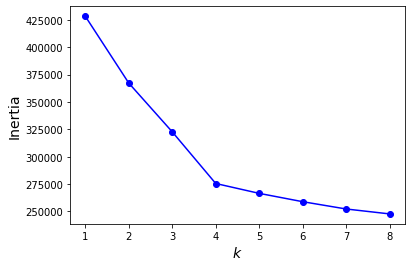

In [ ]:
plt.plot(range(1, 9), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

The elbow is K=4. Try visualize kmeans clustering with 4 clusters.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(crash_prepared_test)

In [ ]:
labels = kmeans.labels_

In [ ]:
crash_df_test = crash_df[:10000]

In [ ]:
x1 = crash_df_test[labels == 0]["LONGITUDE"]
y1 = crash_df_test[labels == 0]["LATITUDE"]
x2 = crash_df_test[labels == 1]["LONGITUDE"]
y2 = crash_df_test[labels == 1]["LATITUDE"]
x3 = crash_df_test[labels == 2]["LONGITUDE"]
y3 = crash_df_test[labels == 2]["LATITUDE"]
x4 = crash_df_test[labels == 3]["LONGITUDE"]
y4 = crash_df_test[labels == 3]["LATITUDE"]

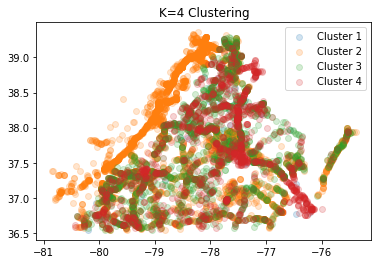

In [ ]:
plt.scatter(x1, y1, label="Cluster 1", alpha = 0.2)
plt.scatter(x2, y2, label="Cluster 2", alpha = 0.2)
plt.scatter(x3, y3, label="Cluster 3", alpha = 0.2)
plt.scatter(x4, y4, label="Cluster 4", alpha = 0.2)
plt.title("K=4 Clustering")
plt.legend()
plt.show()

#Crash-Severity Classification

**CUSTOM CRASH SEVERITY METRIC**

We want our SVM to predict the following 3 categories:
*  MILD - only property damage
*  MEDIUM - Only medium visible- and non- visible injuries occured in a quantity less than 5
*  SEVERE - either there was a severe injury, or the crash was fatal, or 5 or more people were hurt in a medium manner

In [ ]:
crash_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775095 entries, 0 to 884005
Data columns (total 113 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Alcohol_Notalcohol        float64
 1   A_Crash                   int64  
 2   A_People                  int64  
 3   Belted_Unbelted           float64
 4   Bike_Nonbike              float64
 5   B_Crash                   int64  
 6   B_People                  int64  
 7   Carspeedlimit             float64
 8   Collision_Type            object 
 9   Crash_Military_Tm         int64  
 10  Crash_Severity            object 
 11  C_Crash                   int64  
 12  C_People                  int64  
 13  Deer_Nodeer               float64
 14  Distracted_Notdistracted  float64
 15  FAC                       object 
 16  Fatal_Crashes             int64  
 17  First_Harmful_Event       object 
 18  FUN                       object 
 19  Hitrun_Not_Hitrun         float64
 20  K_People                 

In [ ]:
#build our custom crash severity metric into the dataset for training
print(n)
severityList= []
for crash in crash_df.index:  #loop through every crash
  #print(crash_df['Name'][crash], crash_df['Stream'][crash]) 
  if((crash_df['K_People'][crash] >= 1) or (crash_df['A_People'][crash] >=1)) :
      severityList.append('SEVERE')
  elif ((crash_df['B_People'][crash] >= 1) or (crash_df['C_People'][crash] >=1)): #if someone was injured in a medium visible or non visible manner
    severityList.append('MEDIUM')
  else:
    #this means only property damage occured
    severityList.append('MILD')

775095


*Add our Severity Metric to the dataframe and drop the others that could be related to it*

In [ ]:
#add these columns to the dataframe
crash_df['SEVERITY'] = severityList

In [ ]:
#drop the others
crash_df_final = crash_df.drop(["A_Crash", "A_People", "B_Crash", "B_People", "Crash_Severity", "C_Crash", "C_People", "Fatal_Crashes", "K_People", "Persons_Injured","Pedestrians_Injured"], axis=1)

# Matrix Feature Labels (including One-Hot)

In [ ]:
feature_labels = list(crash_df_final)
feature_labels

['Alcohol_Notalcohol',
 'Belted_Unbelted',
 'Bike_Nonbike',
 'Carspeedlimit',
 'Collision_Type',
 'Crash_Military_Tm',
 'Deer_Nodeer',
 'Distracted_Notdistracted',
 'FAC',
 'First_Harmful_Event',
 'FUN',
 'Hitrun_Not_Hitrun',
 'LATITUDE',
 'Light_Condition',
 'LONGITUDE',
 'Motor_Nonmotor',
 'Passage',
 'Pdo_Crash',
 'Pedage',
 'Roadway_Alignment',
 'Roadway_Surface_Cond',
 'School_Zone',
 'Speed_Notspeed',
 'Weather_Condition',
 'Work_Zone_Related',
 'Physical_Juris',
 'drAge_young',
 'drAge_midyoung',
 'drAge_mid',
 'drAge_midold',
 'drAge_old',
 'malesInvolved',
 'femalesInvolved',
 'notProvidedInvolved',
 'ImpropAct1',
 'ImpropAct2',
 'ImpropAct3',
 'ImpropAct4',
 'ImpropAct5',
 'ImpropAct6',
 'ImpropAct7',
 'ImpropAct8',
 'ImpropAct9',
 'ImpropAct10',
 'ImpropAct11',
 'ImpropAct12',
 'ImpropAct13',
 'ImpropAct14',
 'ImpropAct15',
 'ImpropAct16',
 'ImpropAct17',
 'ImpropAct18',
 'ImpropAct19',
 'ImpropAct20',
 'ImpropAct21',
 'ImpropAct22',
 'ImpropAct23',
 'ImpropAct24',
 'ImpropA

In [ ]:
crash_df_final['Collision_Type'].unique()

array(['2. Angle', '4. Sideswipe - Same Direction', '1. Rear End',
       '5. Sideswipe - Opposite Direction', '3. Head On',
       '15. Backed Into', '9. Fixed Object - Off Road', '16. Other',
       '8. Non-Collision', '6. Fixed Object in Road', '10. Deer',
       '11. Other Animal', '12. Ped', '14. Motorcyclist', '7. Train',
       '13. Bicyclist', 'Not Provided', 'Not Applicable'], dtype=object)

In [ ]:
crash_df_final['FAC'].unique()

array(['1.Divided, no control of access',
       '3.Divided, full control of access', '0.Two-way, non-divided',
       '4.One-way, part of a one-way system', '7.Transition',
       '2.Divided, partial control of access',
       '5.Two-way, part of a one-way system',
       'B.Two-way structure (bridge, tunnel, causeway, etc.',
       '6.One-way couplet'], dtype=object)

In [ ]:
crash_df_final['First_Harmful_Event'].unique()

array(['1. On Roadway', '7. In Parking Lane or Zone', '3. Median',
       '2. Shoulder', '4. Roadside', '8. Off Roadway, Location Unknown',
       '9. Outside Right-of-Way', '5. Gore', '6. Separator'], dtype=object)

In [ ]:
crash_df_final['FUN'].unique()

array(['2.Rural Other Principal Arterial',
       'E.Urban Other Principal Arterials; Connecting Links of Other Rural Principal Arterial',
       'H.Urban Minor Arterial', '1.Rural Interstate',
       'A.Urban Interstate', '3.Rural Minor Arterial',
       '4.Rural Major Collector', '6.Rural Local', 'I.Urban Collector',
       'J.Urban Local',
       'B.Urban Freeways and Expressways; Connecting Links of Rural Principal Arterial',
       '5.Rural Minor Collector'], dtype=object)

In [ ]:
crash_df_final['Light_Condition'].unique()

array(['2. Daylight', '4. Darkness - Road Lighted',
       '5. Darkness - Road Not Lighted', '3. Dusk', '1. Dawn',
       '6. Darkness - Unknown Road Lighting', '7. Unknown'], dtype=object)

In [ ]:
crash_df_final['Roadway_Alignment'].unique()

array(['1. Straight - Level', '3. Grade - Straight', '2. Curve - Level',
       '4. Grade - Curve', '6. Hillcrest - Curve', '7. Dip - Straight',
       '10. On/Off Ramp', '5. Hillcrest - Straight', '9. Other',
       '8. Dip - Curve'], dtype=object)

In [ ]:
crash_df_final['Roadway_Surface_Cond'].unique()

array(['1. Dry', '2. Wet', '7. Other', '3. Snowy', '4. Icy', '10. Slush',
       '9. Water (Standing, Moving)', '6. Oil/Other Fluids',
       '11. Sand, Dirt, Gravel', '8. Natural Debris', '5. Muddy'],
      dtype=object)

In [ ]:
crash_df_final['Weather_Condition'].unique()

array(['1. No Adverse Condition (Clear/Cloudy)', '5. Rain', '4. Mist',
       '3. Fog', '6. Snow', '7. Sleet/Hail', '8. Smoke/Dust', '9. Other',
       '11. Severe Crosswinds', '10. Blowing Sand, Soil, Dirt, or Snow',
       'Not Applicable'], dtype=object)

In [ ]:
crash_df_final['Physical_Juris'].unique()

array(['33.Franklin', '9.Bedford', '141.Bedford', '71.Pittsylvania',
       '44.Henry', '7.Augusta', '81.Rockbridge', '60.Montgomery',
       '85.Shenandoah', '80.Roanoke', '82.Rockingham', '53.Loudoun',
       '312.Timberville', '11.Botetourt', '93.Warren',
       '76.Prince William', '72.Powhatan', '34.Frederick', '69.Page',
       '20.Chesterfield', '21.Clarke', '330.Woodstock', '299.Shenandoah',
       '132.Staunton', '129.Salem', '103.Buena Vista', '3.Alleghany',
       '77.Pulaski', '63.New Kent', '42.Hanover', '43.Henrico',
       '37.Goochland', '74.Prince George', '16.Caroline',
       '88.Spotsylvania', '58.Mecklenburg', '99.York', '40.Greensville',
       '91.Sussex', '47.James City', '54.Louisa', '30.Fauquier',
       '2.Albemarle', '89.Stafford', '23.Culpeper', '67.Nottoway',
       '48.King George', '39.Greene', '4.Amelia', '50.King William',
       '49.King & Queen', '28.Essex', '26.Dinwiddie', '51.Lancaster',
       '56.Madison', '68.Orange', '78.Rappahannock', '79.Rich

In [ ]:
feature_labels_one_hot = ['Alcohol_Notalcohol',
 'Belted_Unbelted',
 'Bike_Nonbike',
 'Carspeedlimit',
'2. Angle', '4. Sideswipe - Same Direction', '1. Rear End',
       '5. Sideswipe - Opposite Direction', '3. Head On',
       '15. Backed Into', '9. Fixed Object - Off Road', '16. Other',
       '8. Non-Collision', '6. Fixed Object in Road', '10. Deer',
       '11. Other Animal', '12. Ped', '14. Motorcyclist', '7. Train',
       '13. Bicyclist', 'Not Provided', 'Not Applicable',
 'Crash_Military_Tm',
 'Deer_Nodeer',
 'Distracted_Notdistracted',
'1.Divided, no control of access',
       '3.Divided, full control of access', '0.Two-way, non-divided',
       '4.One-way, part of a one-way system', '7.Transition',
       '2.Divided, partial control of access',
       '5.Two-way, part of a one-way system',
       'B.Two-way structure (bridge, tunnel, causeway, etc.',
       '6.One-way couplet',
'1. On Roadway', '7. In Parking Lane or Zone', '3. Median',
       '2. Shoulder', '4. Roadside', '8. Off Roadway, Location Unknown',
       '9. Outside Right-of-Way', '5. Gore', '6. Separator',
'2.Rural Other Principal Arterial',
       'E.Urban Other Principal Arterials; Connecting Links of Other Rural Principal Arterial',
       'H.Urban Minor Arterial', '1.Rural Interstate',
       'A.Urban Interstate', '3.Rural Minor Arterial',
       '4.Rural Major Collector', '6.Rural Local', 'I.Urban Collector',
       'J.Urban Local',
       'B.Urban Freeways and Expressways; Connecting Links of Rural Principal Arterial',
       '5.Rural Minor Collector',
 'Hitrun_Not_Hitrun',
 'LATITUDE',
'2. Daylight', '4. Darkness - Road Lighted',
       '5. Darkness - Road Not Lighted', '3. Dusk', '1. Dawn',
       '6. Darkness - Unknown Road Lighting', '7. Unknown',
 'LONGITUDE',
 'Motor_Nonmotor',
 'Passage',
 'Pdo_Crash',
 'Pedage',
'1. Straight - Level', '3. Grade - Straight', '2. Curve - Level',
       '4. Grade - Curve', '6. Hillcrest - Curve', '7. Dip - Straight',
       '10. On/Off Ramp', '5. Hillcrest - Straight', '9. Other',
       '8. Dip - Curve',
'1. Dry', '2. Wet', '7. Other', '3. Snowy', '4. Icy', '10. Slush',
       '9. Water (Standing, Moving)', '6. Oil/Other Fluids',
       '11. Sand, Dirt, Gravel', '8. Natural Debris', '5. Muddy',
 'School_Zone',
 'Speed_Notspeed',
'1. No Adverse Condition (Clear/Cloudy)', '5. Rain', '4. Mist',
       '3. Fog', '6. Snow', '7. Sleet/Hail', '8. Smoke/Dust', '9. Other',
       '11. Severe Crosswinds', '10. Blowing Sand, Soil, Dirt, or Snow',
       'Not Applicable',
 'Work_Zone_Related',
'33.Franklin', '9.Bedford', '141.Bedford', '71.Pittsylvania',
       '44.Henry', '7.Augusta', '81.Rockbridge', '60.Montgomery',
       '85.Shenandoah', '80.Roanoke', '82.Rockingham', '53.Loudoun',
       '312.Timberville', '11.Botetourt', '93.Warren',
       '76.Prince William', '72.Powhatan', '34.Frederick', '69.Page',
       '20.Chesterfield', '21.Clarke', '330.Woodstock', '299.Shenandoah',
       '132.Staunton', '129.Salem', '103.Buena Vista', '3.Alleghany',
       '77.Pulaski', '63.New Kent', '42.Hanover', '43.Henrico',
       '37.Goochland', '74.Prince George', '16.Caroline',
       '88.Spotsylvania', '58.Mecklenburg', '99.York', '40.Greensville',
       '91.Sussex', '47.James City', '54.Louisa', '30.Fauquier',
       '2.Albemarle', '89.Stafford', '23.Culpeper', '67.Nottoway',
       '48.King George', '39.Greene', '4.Amelia', '50.King William',
       '49.King & Queen', '28.Essex', '26.Dinwiddie', '51.Lancaster',
       '56.Madison', '68.Orange', '78.Rappahannock', '79.Richmond',
       '204.Culpeper', '170.Boones Mill', '203.Crewe', '310.Tappahannock',
       '157.Rocky Mount', '301.South Hill', '111.Fredericksburg',
       '62.Nelson', '15.Campbell', '19.Charlotte', '41.Halifax',
       '5.Amherst', '73.Prince Edward', '36.Gloucester', '12.Brunswick',
       '59.Middlesex', '1.Accomack', '87.Southampton', '65.Northampton',
       '6.Appomattox', '165.Appomattox', '248.Keysville',
       '130.South Boston', '307.Stuart', '178.Brodnax', '250.LaCrosse',
       '274.Onley', '217.Exmore', '183.Capron', '267.Nassawadox',
       '14.Buckingham', '24.Cumberland', '70.Patrick', '18.Charles City',
       '66.Northumberland', '96.Westmoreland', '32.Fluvanna',
       '55.Lunenburg', '57.Mathews', '46.Isle of Wight', '90.Surry',
       '225.Gordonsville', '166.Ashland', '251.Lawrenceville',
       '179.Brookneal', '160.Accomac', '328.Windsor', '308.Surry',
       '246.Keller', '192.Clarksville', '162.Altavista', '320.Wakefield',
       '323.Waverly', '276.Painter', '186.Chase City', '243.Ivor',
       '109.Emporia', '208.Dillwyn', '182.Cape Charles', '263.Montross',
       '321.Warsaw', '254.Louisa', '286.Purcellville', '325.West Point',
       '199.Colonial Beach', '297.Scottsburg', '253.Leesburg',
       '142.Blackstone', '275.Orange', '300.Smithfield', '161.Alberta',
       '188.Cheriton', '187.Chatham', '331.Hurt', '190.Chincoteague',
       '108.Danville', '227.Gretna', '159.Luray', '306.Strasburg',
       '219.Floyd', '280.Pembroke', '180.Buchanan', '268.New Castle',
       '168.Berryville', '265.Mount Jackson', '303.Stanley',
       '269.New Market', '215.Edinburg', '202.Craigsville',
       '177.Broadway', '313.Toms Brook', '262.Monterey', '260.Middletown',
       '216.Elkton', '223.Glasgow', '264.Mount Crawford',
       '259.Middleburg', '228.Grottoes', '218.Fincastle', '210.Dublin',
       '224.Glen Lyn', '172.Boyce', '232.Hamilton', '115.Harrisonburg',
       '138.Winchester', '136.Waynesboro', '22.Craig', '289.Rich Creek',
       '8.Bath', '207.Dendron', '258.Melfa', '29.Fairfax',
       '118.Lynchburg', '127.Richmond', '134.Virginia Beach',
       '131.Chesapeake', '122.Norfolk', '121.Newport News', '133.Suffolk',
       '124.Portsmouth', '104.Charlottesville', '114.Hampton',
       '156.Warrenton', '31.Floyd', '35.Giles', '279.Pearisburg',
       '226.Goshen', '327.White Stone', '173.Boydton',
       '171.Bowling Green', '322.Washington', '249.Kilmarnock',
       '209.Drakes Branch', '185.Charlotte C.H.', '317.Victoria',
       '288.Remington', '302.Stanardsville', '236.Hillsboro',
       '200.Columbia', '45.Highland', '112.Front Royal',
       '120.Martinsville', '266.Narrows', '154.Christiansburg',
       '273.Onancock', '169.Bloxom', '144.Farmville', '247.Kenbridge',
       '167.Belle Haven', '255.Lovettsville', '284.Port Royal',
       '201.Courtland', '305.Stony Creek', '304.Stephens City',
       '291.Round Hill', '233.Haymarket', '241.Iron Gate',
       '100.Alexandria', '137.Williamsburg', '176.Bridgewater',
       '0.Arlington', '290.Ridgeway', '126.Radford', '150.Blacksburg',
       '155.Manassas', '151.Fairfax', '145.Franklin', '147.Poquoson',
       '153.Vienna', '235.Herndon', '181.Burkeville', '128.Roanoke',
       '107.Covington', '117.Lexington', '206.Dayton', '163.Amherst',
       '105.Clifton Forge', '298.Scottsville', '152.Manassas Park',
       '125.Pulaski', '230.Halifax', '242.Irvington', '315.Troutville',
       '212.Dumfries', '214.Eastville', '282.Phenix', '174.Boykins',
       '318.Virgilina', '256.Madison', '311.The Plains', '278.Parksley',
       '257.McKenney', '191.Claremont', '231.Hallwood', '270.Newsoms',
       '296.Saxis', '244.Jarratt', '175.Branchville', '110.Falls Church',
       '272.Occoquan', '194.Clifton', '17.Carroll', '98.Wythe',
       '10.Bland', '86.Smyth', '38.Grayson', '95.Washington',
       '237.Hillsville', '140.Abingdon', '83.Russell', '13.Buchanan',
       '92.Tazewell', '25.Dickenson', '234.Haysi', '119.Marion',
       '189.Chilhowie', '240.Independence', '222.Glade Spring',
       '292.Rural Retreat', '220.Fries', '314.Troutdale',
       '139.Wytheville', '252.Lebanon', '205.Damascus', '316.Urbanna',
       '196.Clintwood', '229.Grundy', '158.Tazewell', '319.Wachapreague',
       '239.Honaker', '295.Saltville', '113.Galax', '283.Pocahontas',
       '193.Cleveland', '102.Bristol', '149.Vinton',
       '106.Colonial Heights', '143.Bluefield', '148.Richlands',
       '116.Hopewell', '287.Quantico', '123.Petersburg', '261.Mineral',
       '184.Cedar Bluff', '97.Wise', '84.Scott', '324.Weber City',
       '329.Wise', '221.Gate City', '52.Lee', '281.Pennington Gap',
       '198.Coeburn', '294.Saint Paul', '195.Clinchport', '285.Pound',
       '146.Norton', '101.Big Stone Gap', '271.Nickelsville',
       '211.Duffield', '245.Jonesville', '164.Appalachia', '339.Clinchco',
       '213.Dungannon', '293.St. Charles', '277.Pamplin City',
 'drAge_young',
 'drAge_midyoung',
 'drAge_mid',
 'drAge_midold',
 'drAge_old',
 'malesInvolved',
 'femalesInvolved',
 'notProvidedInvolved',
 'ImpropAct1',
 'ImpropAct2',
 'ImpropAct3',
 'ImpropAct4',
 'ImpropAct5',
 'ImpropAct6',
 'ImpropAct7',
 'ImpropAct8',
 'ImpropAct9',
 'ImpropAct10',
 'ImpropAct11',
 'ImpropAct12',
 'ImpropAct13',
 'ImpropAct14',
 'ImpropAct15',
 'ImpropAct16',
 'ImpropAct17',
 'ImpropAct18',
 'ImpropAct19',
 'ImpropAct20',
 'ImpropAct21',
 'ImpropAct22',
 'ImpropAct23',
 'ImpropAct24',
 'ImpropAct25',
 'ImpropAct26',
 'ImpropAct27',
 'ImpropAct28',
 'ImpropAct29',
 'ImpropAct30',
 'ImpropAct31',
 'ImpropAct32',
 'ImpropAct33',
 'ImpropAct34',
 'ImpropAct35',
 'ImpropAct36',
 'ImpropAct37',
 'ImpropAct38',
 'ImpropAct39',
 'ImpropAct40',
 'ImpropAct41',
 'ImpropAct42',
 'ImpropAct43',
 'Vehicle_Type_1',
 'Vehicle_Type_2',
 'Vehicle_Type_3',
 'Vehicle_Type_4',
 'Vehicle_Type_5',
 'Vehicle_Type_6',
 'Vehicle_Type_7',
 'Vehicle_Type_8',
 'Vehicle_Type_9',
 'Vehicle_Type_10',
 'Vehicle_Type_11',
 'Vehicle_Type_12',
 'Vehicle_Type_13',
 'Vehicle_Type_14',
 'Vehicle_Type_15',
 'Vehicle_Type_16',
 'Vehicle_Type_17',
 'Vehicle_Type_18',
 'Vehicle_Type_19',
 'Vehicle_Type_20',
 'Vehicle_Type_21',
 'Vehicle_Type_22',
 'Vehicle_Type_23',
 'Vehicle_Type_24',
 'Vehicle_Type_25']

In [ ]:
feature_labels_one_hot

['Alcohol_Notalcohol',
 'Belted_Unbelted',
 'Bike_Nonbike',
 'Carspeedlimit',
 '2. Angle',
 '4. Sideswipe - Same Direction',
 '1. Rear End',
 '5. Sideswipe - Opposite Direction',
 '3. Head On',
 '15. Backed Into',
 '9. Fixed Object - Off Road',
 '16. Other',
 '8. Non-Collision',
 '6. Fixed Object in Road',
 '10. Deer',
 '11. Other Animal',
 '12. Ped',
 '14. Motorcyclist',
 '7. Train',
 '13. Bicyclist',
 'Not Provided',
 'Not Applicable',
 'Crash_Military_Tm',
 'Deer_Nodeer',
 'Distracted_Notdistracted',
 '1.Divided, no control of access',
 '3.Divided, full control of access',
 '0.Two-way, non-divided',
 '4.One-way, part of a one-way system',
 '7.Transition',
 '2.Divided, partial control of access',
 '5.Two-way, part of a one-way system',
 'B.Two-way structure (bridge, tunnel, causeway, etc.',
 '6.One-way couplet',
 '1. On Roadway',
 '7. In Parking Lane or Zone',
 '3. Median',
 '2. Shoulder',
 '4. Roadside',
 '8. Off Roadway, Location Unknown',
 '9. Outside Right-of-Way',
 '5. Gore',
 '

In [ ]:
len(feature_labels_one_hot)

503

# Logistic Regression with Lasso Regularization

In [ ]:
crash_df_subset = crash_df_final
crash_df_subset.info(verbose='true')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775095 entries, 0 to 884005
Data columns (total 103 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Alcohol_Notalcohol        float64
 1   Belted_Unbelted           float64
 2   Bike_Nonbike              float64
 3   Carspeedlimit             float64
 4   Collision_Type            object 
 5   Crash_Military_Tm         int64  
 6   Deer_Nodeer               float64
 7   Distracted_Notdistracted  float64
 8   FAC                       object 
 9   First_Harmful_Event       object 
 10  FUN                       object 
 11  Hitrun_Not_Hitrun         float64
 12  LATITUDE                  float64
 13  Light_Condition           object 
 14  LONGITUDE                 float64
 15  Motor_Nonmotor            float64
 16  Passage                   float64
 17  Pdo_Crash                 int64  
 18  Pedage                    float64
 19  Roadway_Alignment         object 
 20  Roadway_Surface_Cond     

In [ ]:
crash_df_subset.shape

(775095, 103)

Take away fatal_crashes feature to use as label

In [ ]:
label = crash_df_subset['SEVERITY']

Numerical

In [ ]:
crash_num = crash_df_subset.drop(["Collision_Type","FAC", "First_Harmful_Event", "FUN", "Light_Condition", "Roadway_Alignment", "Roadway_Surface_Cond", "SEVERITY", "Weather_Condition", "Physical_Juris"], axis=1)
crash_num.info(verbose='true')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775095 entries, 0 to 884005
Data columns (total 93 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Alcohol_Notalcohol        775095 non-null  float64
 1   Belted_Unbelted           775095 non-null  float64
 2   Bike_Nonbike              775095 non-null  float64
 3   Carspeedlimit             775095 non-null  float64
 4   Crash_Military_Tm         775095 non-null  int64  
 5   Deer_Nodeer               775095 non-null  float64
 6   Distracted_Notdistracted  775095 non-null  float64
 7   Hitrun_Not_Hitrun         775095 non-null  float64
 8   LATITUDE                  775095 non-null  float64
 9   LONGITUDE                 775095 non-null  float64
 10  Motor_Nonmotor            775095 non-null  float64
 11  Passage                   775095 non-null  float64
 12  Pdo_Crash                 775095 non-null  int64  
 13  Pedage                    775095 non-null  f

Categorical

In [ ]:
#Categorical features
crash_cat = crash_df_subset[["Collision_Type","FAC", "First_Harmful_Event", "FUN", "Light_Condition", "Roadway_Alignment", "Roadway_Surface_Cond", "Weather_Condition", "Physical_Juris"]]
crash_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775095 entries, 0 to 884005
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Collision_Type        775095 non-null  object
 1   FAC                   775095 non-null  object
 2   First_Harmful_Event   775095 non-null  object
 3   FUN                   775095 non-null  object
 4   Light_Condition       775095 non-null  object
 5   Roadway_Alignment     775095 non-null  object
 6   Roadway_Surface_Cond  775095 non-null  object
 7   Weather_Condition     775095 non-null  object
 8   Physical_Juris        775095 non-null  object
dtypes: object(9)
memory usage: 79.1+ MB


Create pipeline

In [ ]:
#imports
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Numerical pipeline
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

#Categorical encoder
cat_encoder = OneHotEncoder(sparse=False)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(crash_num) 
cat_attribs = list(crash_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [ ]:
crash_prepared = full_pipeline.fit_transform(crash_df_subset)
crash_prepared

<775095x503 sparse matrix of type '<class 'numpy.float64'>'
	with 75184215 stored elements in Compressed Sparse Row format>

Split into the train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(crash_prepared, label, random_state=42)

In [ ]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [ ]:
pd.DataFrame.sparse.from_spmatrix(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502
0,-0.245173,-0.197819,-0.068548,-0.292521,1.073723,-0.268349,-0.499204,-0.226158,0.430358,-0.438315,-0.127628,-0.103553,0.732104,-0.086919,-0.117959,-0.499639,-0.164058,-0.712392,-0.836894,-0.823497,1.756636,3.889573,1.295497,-1.035896,-0.242681,0.589884,-0.132015,-0.144201,-0.011472,-0.021102,-0.024632,-0.007273,-0.066023,-0.060223,-0.109774,-0.400612,-0.584122,-0.034975,-0.056357,-0.05323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.245173,-0.197819,-0.068548,-0.292521,0.721649,-0.268349,-0.499204,-0.226158,0.306362,-0.454871,-0.127628,-0.103553,-1.365926,12.031715,-0.117959,-0.499639,-0.164058,-0.712392,0.664676,-0.823497,-0.479561,-0.243082,-1.322396,0.304472,-0.242681,0.589884,-0.132015,-0.144201,-0.011472,-0.021102,-0.024632,-0.007273,-0.066023,-0.060223,-0.109774,-0.400612,-0.584122,-0.034975,-0.056357,-0.05323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.245173,-0.197819,-0.068548,-0.292521,-1.153012,-0.268349,2.003191,-0.226158,-0.296566,0.296928,-0.127628,-0.103553,0.732104,-0.086919,8.477489,2.001445,-0.164058,-0.712392,0.664676,0.679999,-0.479561,-0.243082,-0.013449,0.304472,-0.242681,0.589884,-0.132015,-0.144201,-0.011472,-0.021102,-0.024632,-0.007273,-0.066023,-0.060223,-0.109774,2.496178,-0.584122,-0.034975,-0.056357,-0.05323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.245173,-0.197819,-0.068548,-0.292521,-0.959463,-0.268349,-0.499204,-0.226158,-0.921210,-1.496205,-0.127628,-0.103553,-1.365926,-0.086919,-0.117959,-0.499639,-0.164058,0.999465,0.664676,-0.823497,-0.479561,-0.243082,1.295497,-1.035896,-0.242681,0.589884,-0.132015,-0.144201,-0.011472,-0.021102,-0.024632,-0.007273,-0.066023,-0.060223,-0.109774,2.496178,-0.584122,-0.034975,-0.056357,-0.05323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.245173,-0.197819,-0.068548,0.830345,0.552063,-0.268349,-0.499204,-0.226158,1.104093,0.410753,-0.127628,-0.103553,0.732104,-0.086919,-0.117959,-0.499639,6.095394,-0.712392,0.664676,0.679999,-0.479561,-0.243082,1.295497,-1.035896,-0.242681,0.589884,-0.132015,-0.144201,-0.011472,-0.021102,-0.024632,-0.007273,-0.066023,-0.060223,-0.109774,-0.400612,-0.584122,-0.034975,-0.056357,-0.05323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581316,-0.245173,-0.197819,-0.068548,-0.292521,0.480173,-0.268349,2.003191,-0.226158,-0.222497,0.280445,-0.127628,-0.103553,-1.365926,-0.086919,-0.117959,2.001445,-0.164058,-0.712392,0.664676,0.679999,-0.479561,-0.243082,-0.013449,0.304472,-0.242681,0.589884,-0.132015,-0.144201,-0.011472,-0.021102,-0.024632,-0.007273,-0.066023,-0.060223,-0.109774,-0.400612,-0.584122,-0.034975,-0.056357,-0.05323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581317,-0.245173,-0.197819,-0.068548,-0.292521,

Logistic regression with lasso regularization

In [ ]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))

In [ ]:
sel_.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=None,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
features = [True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True, False, False,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True, False,  True, False,  True, False, False,
        True, False,  True,  True,  True, False, False,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False,  True,  True,  True, False,  True,  True,
        True, False, False, False,  True,  True, False,  True,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True,  True, False,  True, False, False,  True,  True,
       False,  True, False, False, False,  True,  True, False, False,
       False,  True, False, False,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True, False, False,  True,  True,  True, False,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True]

In [ ]:
features

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True

In [ ]:
len(features)

503

In [ ]:
len(feature_labels_one_hot)

503

In [ ]:

X_train_mat = pd.DataFrame(X_train.todense())

In [ ]:
sum(features) #401 trues

401

In [ ]:
match = {'Feature':feature_labels_one_hot,'Status':features}

In [ ]:
feature_status = pd.DataFrame(match)
feature_status

,Feature,Status
0,Alcohol_Notalcohol,True
1,Belted_Unbelted,True
2,Bike_Nonbike,True
3,Carspeedlimit,True
4,2. Angle,True
5,4. Sideswipe - Same Direction,True
6,1. Rear End,True
7,5. Sideswipe - Opposite Direction,True
8,3. Head On,True
9,15. Backed Into,True


In [ ]:
pd.set_option('display.max_rows', 503)

In [ ]:
pd.options.display.max_rows

503

In [ ]:
selected_feat_train = X_train_mat.columns[features]

In [ ]:
selected_feat_train #matrix with 401 columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            493, 494, 495, 496, 497, 498, 499, 500, 501, 502],
           dtype='int64', length=401)

In [ ]:
X_test_mat = pd.DataFrame(X_test.todense())
selected_feat_test = X_test_mat.columns[features]

In [ ]:
selected_feat_test

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            493, 494, 495, 496, 497, 498, 499, 500, 501, 502],
           dtype='int64', length=401)